르네상스 테크놀로지의 Peter Brown은 이전에 IBM에서 일하다가 NLP를 적용하여 가장 성공한 계량적으로 헤지 펀드를 운용한 사람이다. 요즘 가장 중요한 정보는 쓰여지거나 말해지는 언어이다. 금융 전문가들에게 대부분의 시간을 어디에 쓰는지 물어보면, 대부분의 시간을 읽는데 쓴다는 것을 알 수 있다. 다양한 애널리스트들의 리포트를 포함하여 헤드라인 등 많은 데이터들이 포함된다. 이러한 정보를 자동으로 처리하면 트레이딩 속도를 높일 수 있고 트레이딩을 위해 다양한 정보를 쓸 수 있으면 전반적으로 비용을 줄일 수 있다.

NLP는 금융 분야에 들어왓다. 예를 들면, 보험 회사들은 고객 claim을 자동으로 처리한다. 텍스트에 대한 이해로 금융 분야에 머신러닝을 적용 것이 기본이 되고 있다. 

역사적으로 NLP는 전통적으로 언어학자들에 의해 손수 만들어진 규칙에 의존했다. 언어학자는 신경망에 의해 대체되고 있다.

이번 챕터에서는 케라스에서 어떻게 파워풀한 NLP모델을 만드는지 알아볼 것이며 spaCy NLP 라이브러리에 대해서도 알아볼 것 이다.

### An introductory guide to spaCy

spaCy의 Doc과 Vocab 클래스로 구성되어 있다. Doc 인스턴스는 하나의 도큐먼트, 텍스트, 토크아니징된 버전, 그리고 개체명이 포함되어 있다. Vocab은 도큐먼트 사이에서 찾을 수 있는 정보를 담고 있다. 

spaCy는 NLP에 필요한 많은 파이프라인 features에 유용하다. 처음엔 추상적으로 들릴 수 있지만, 다양한 태스크를 다뤄보면 이해할 수 있다.

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

In [4]:
a1 = pd.read_csv('../input/articles1.csv',index_col=0)
a2 = pd.read_csv('../input/articles2.csv',index_col=0)
a3 = pd.read_csv('../input/articles3.csv',index_col=0)

In [5]:
df = pd.concat([a1, a2, a3])

In [6]:
del a1, a2, a3

In [12]:
df

,id,title,publication,author,date,year,month,url,content
0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."
5,17288,"Sick With a Cold, Queen Elizabeth Misses New Y...",New York Times,Sewell Chan,2017-01-02,2017.0,1.0,NaN,"LONDON — Queen Elizabeth II, who has been b..."
6,17289,Taiwan’s President Accuses China of Renewed In...,New York Times,Javier C. Hernández,2017-01-02,2017.0,1.0,NaN,BEIJING — President Tsai of Taiwan sharpl...
7,17290,"After ‘The Biggest Loser,’ Their Bodies Fought...",New York Times,Gina Kolata,2017-02-08,2017.0,2.0,NaN,"Danny Cahill stood, slightly dazed, in a blizz..."
8,17291,"First, a Mixtape. Then a Romance. - The New Yo...",New York Times,Katherine Rosman,2016-12-31,2016.0,12.0,NaN,"Just how is Hillary Kerr, the founder of ..."
9,17292,Calling on Angels While Enduring the Trials of...,New York Times,Andy Newman,2016-12-31,2016.0,12.0,NaN,Angels are everywhere in the Muñiz family’s ap...


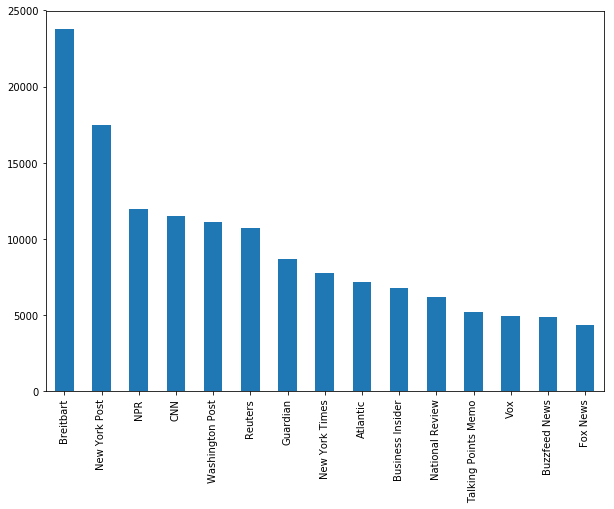

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
df.publication.value_counts().plot(kind='bar')

데이터에서 기사의 내용을 가져온다.

### Named entity recognition

Named entity recognition(NER)은 텍스트가 무엇을 업급하는지 나타내는 것이다. 

In [20]:
import spacy
from spacy import displacy
nlp = spacy.load('en')

text = df.loc[0,'content']

In [21]:
doc = nlp(text)

In [22]:
print(doc)

WASHINGTON  —   Congressional Republicans have a new fear when it comes to their    health care lawsuit against the Obama administration: They might win. The incoming Trump administration could choose to no longer defend the executive branch against the suit, which challenges the administration’s authority to spend billions of dollars on health insurance subsidies for   and   Americans, handing House Republicans a big victory on    issues. But a sudden loss of the disputed subsidies could conceivably cause the health care program to implode, leaving millions of people without access to health insurance before Republicans have prepared a replacement. That could lead to chaos in the insurance market and spur a political backlash just as Republicans gain full control of the government. To stave off that outcome, Republicans could find themselves in the awkward position of appropriating huge sums to temporarily prop up the Obama health care law, angering conservative voters who have been d

spaCy의 가장 우수한 특징 중 하나는 visualizer인 displacy인데 텍스트의 named entity를 텍스트 상에서 보여준다. 

In [23]:
displacy.render(doc, style = 'ent', jupyter = True)

기존에 학습된 데이터를 가지고 신경망에 의해 태깅이 된다. 이것을 목적에 맞게 fine-tune한 태깅 모델이 필요하다. 

In [24]:
nlp = spacy.load('en',
                 disable=['parser', 
                          'tagger',
                          'textcat'])

organizations이 무엇에 대해 썼는지 알기 위해, NER만 건져내는 새로운 파이프라인을 만들어 실행이 더 빠르게 되도록 한다.

In [29]:
from tqdm import tqdm, tqdm_notebook

frames = []
for i in tqdm_notebook(range(1000)):
    doc = df.loc[i,'content']
    text_id = df.loc[i,'id']
    doc = nlp(doc)
    ents = [(e.text, e.start_char, e.end_char, e.label_) 
            for e in doc.ents 
            if len(e.text.strip(' -—')) > 0]
    frame = pd.DataFrame(ents)
    frame['id'] = text_id
    frames.append(frame)

In [30]:
npf = pd.concat(frames)

In [31]:
npf.head()

,0,1,2,3,id
0,WASHINGTON,0,10,GPE,17283
1,Republicans,30,41,NORP,17283
2,Obama,116,121,PERSON,17283
3,Trump,167,172,ORG,17283
4,billions of dollars,317,336,MONEY,17283


In [32]:
npf.columns = ['Text','Start','Stop','Type','id']

entity 타입의 분포를 plot해보면 아래와 같다.

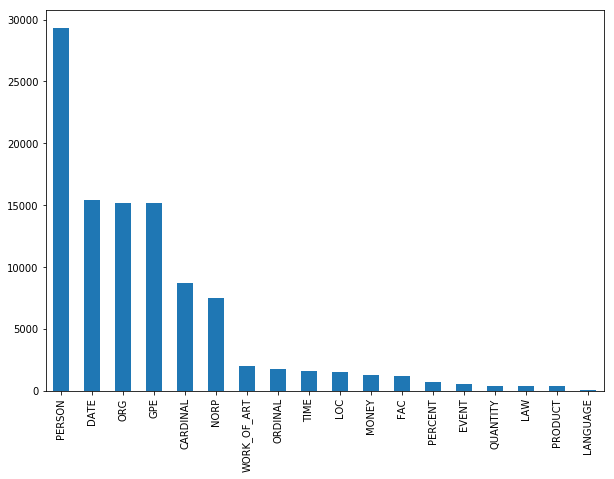

In [34]:
plt.figure(figsize=(10,7))
npf.Type.value_counts().plot(kind='bar')

ORG에서 상위 빈도수 기준으로 상위 15의 organizations을 보면 아래와 같다.

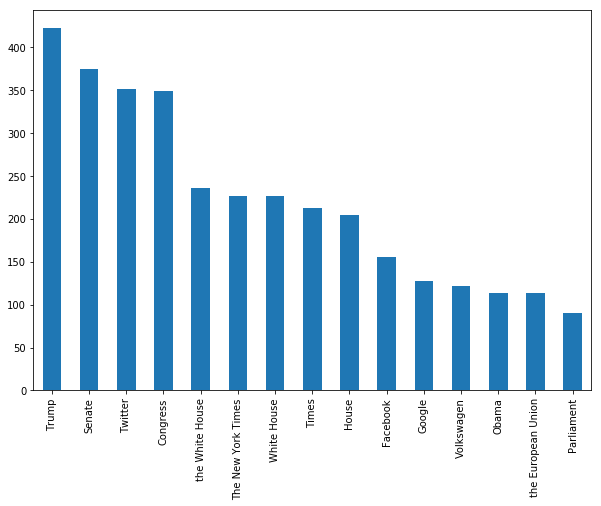

In [35]:
orgs = npf[npf.Type == 'ORG']

plt.figure(figsize=(10,7))
orgs.Text.value_counts()[:15].plot(kind='bar')

사전에 학습된 NER 모델을 통해 NLP의 많고 흔한 문제를 해결할 수 있다. 예를 들어, 뉴욕 타임즈는 워싱턴 포스트나나 다른 것 보다 entity로 더 자주 언급 되는 것인지 볼 수 있다.

### Fine-tuning the NER

사전에 학습된 NER은 특정 텍스트에서 잘 수행되지 않읋 수 있다. 이를 해결하기 위해, fine-tune NER model이 필요하다. 

트레이닝 데이터는 아래와 같다.

In [36]:
TRAIN_DATA = [
    ('Who is Shaka Khan?', {
        'entities': [(7, 17, 'PERSON')]
    }),
    ('I like London and Berlin.', {
        'entities': [(7, 13, 'LOC'), (18, 24, 'LOC')]
    })
]

In [37]:
nlp = spacy.load('en')

기존에 있는 모델을 읽으려면, 아래와 같이 실행하면 된다.

In [38]:
if 'ner' not in nlp.pipe_names:
    ner = nlp.create_pipe('ner')
    nlp.add_pipe(ner, last=True)
else:
    ner = nlp.get_pipe('ner')

다음으로 NER이 우리가 가진 Label을 인식할 수 있는지 확인하는 것이다. 새로운 개체명 타입이 데이터에 포함되어 있다면, add_label 함수로 label type을 NER에 추가할 수 있다.

아래의 코드로 추가할 수 있다.

In [39]:
for _, annotations in TRAIN_DATA:
    for ent in annotations.get('entities'):
        ner.add_label(ent[2])

In [40]:
import random

In [44]:
TRAIN_DATA[0][1].get('entities')

[(7, 17, 'PERSON')]

In [48]:
nlp.pipe_names

['tagger', 'parser', 'ner']

In [49]:
n_iter = 5

# 트레이닝 하는 동안 다른 pipe를 이용하지 않기 위해 가져온다.
other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'ner']

with nlp.disable_pipes(*other_pipes):  # only train NER
    optimizer = nlp._optimizer 
    if not nlp._optimizer:
        optimizer = nlp.begin_training()
    
    for itn in range(n_iter):
        random.shuffle(TRAIN_DATA)
        losses = {}
        for text, annotations in TRAIN_DATA:
            nlp.update(
                [text],  # 텍스트의 배치
                [annotations],  # annotations의 배치
                drop=0.5,  # dropout - 데이터를 기억하기 어렵게 만들기 위해 
                sgd=optimizer,  # 가중치 업데이트
                losses=losses)
        print(losses)

{'ner': 4.472651773932038}
{'ner': 5.256316780531009}
{'ner': 7.497757661861193}
{'ner': 5.9527950310668984}
{'ner': 5.925831200949467}


### Part of speech(POS)(품사) tagging

2017년 10월 10일 화요일 9:34에서 9:36분 사이 다우 존스 newswire는 기술적인 에러가 발생하여 이상한 헤드라인을 포스팅하였다. 그 중 하나는 구글이 애플을 산다는 것이었다. 이 4글자가 애플 주식을 2퍼센트 오르게 만들었다. 알고리즘 트레이딩 시스템은 이러한 상황을 인식하지 못한다. 

한가지 의문이 생기는데 왜 트레이딩 시스템이 이 4글자에 의존하여 주식을 사게 만들었을까? 그에 대한 해답은 Part of speech tagging(POS tagging)이다. POS tagging은 단어가 어떠한 기능을 가지고 있는지 그리고 단어가 서로 어떻게 관련이 있는지 이해할 수 있다. 

spaCy는 사전에 학습된 POS tagger를 제공한다. 이번에는 구글/애플 뉴스 스토리에 적용해보자 한다. 

In [2]:
import spacy
from spacy import displacy
nlp = spacy.load('en')

In [3]:
nlp = spacy.load('en')
doc = 'Google to buy apple'
doc = nlp(doc)

for chunk in doc.noun_chunks:
    print(chunk.text, chunk.root.text, chunk.root.dep_, chunk.root.head.text)

Google Google ROOT Google
apple apple dobj buy


이 문장에서 구글은 문장의 root이다. 반면에 애플은 문장의 객체이다. 동사 buy는 애플에 적용된다. 

### Rule-based matching
